In [1]:
import utils.data as data
import utils.stats as stats
import numpy as np
import matplotlib.pyplot as plt


In [4]:
def tmp(dataset, filename, time_unit_exp):
    df = data.load_data(dataset, filename, verbose=False)

    # compute the packet counts
    timestamps, pkt_counts = stats.byte_count(
        df, time_unit_exp, all_unit=True, verbose=True)

    print(timestamps[:10])
    print(pkt_counts[:10])

    # plt.plot(timestamps, pkt_counts)
    plt.plot(stats.autocorr(pkt_counts), label=filename)

    return 

tmp("ugr16", "raw.csv", -2)
tmp("ugr16", "syn.csv", -2)
plt.legend()
del tmp

Loading data from:
	data\ugr16\raw.csv
Number of packets: 1000000
Trace duration: 1342.636 seconds
Time unit 1.0e-02 has 977 bars


e:\Projects\NTA\utils\stats.py:61: RuntimeWarning: invalid value encountered in cast
  T = T.astype(int)
e:\Projects\NTA\utils\stats.py:86: RuntimeWarning: overflow encountered in scalar subtract
  total_duration = (T.max() - T.min()) / 1e7


IndexError: index 0 is out of bounds for axis 0 with size 0

Loading data from:
	data/ugr16/raw.csv
Number of packets: 1000000
Trace duration: 1342.636 seconds
Time unit 1.0e-02 has 101539 bars
[2. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
Autocorrelation function: [0.041905   0.041905   0.03276044 0.04107895 0.03272979 0.03492908
 0.03135451 0.03498933 0.03325668 0.03297599 0.03023954 0.03767118
 0.03453265 0.03760945 0.02773167 0.03165819 0.02708617 0.03150596
 0.02863488 0.03169465]
Autocorrelation function: [1.04192762e-05 2.54819255e-06 2.58971865e-06 2.52176685e-06
 2.64634515e-06 2.38586325e-06 6.34594322e-06 2.24240944e-06
 2.20465844e-06 2.17068254e-06 2.15558214e-06 2.16313234e-06
 2.17068254e-06 2.16313234e-06 2.18578294e-06 2.15935724e-06
 2.11028094e-06 6.00240912e-06 1.99702794e-06 3.94875468e-06]
Hurst exponent: -0.005244899076525809
Loading data from:
	data/ugr16/syn.csv
Number of packets: 1051363
Trace duration: 1847.78589625 seconds
Time unit 1.0e-02 has 111583 bars
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Autocorrelation function: [0.69786482 0.6978

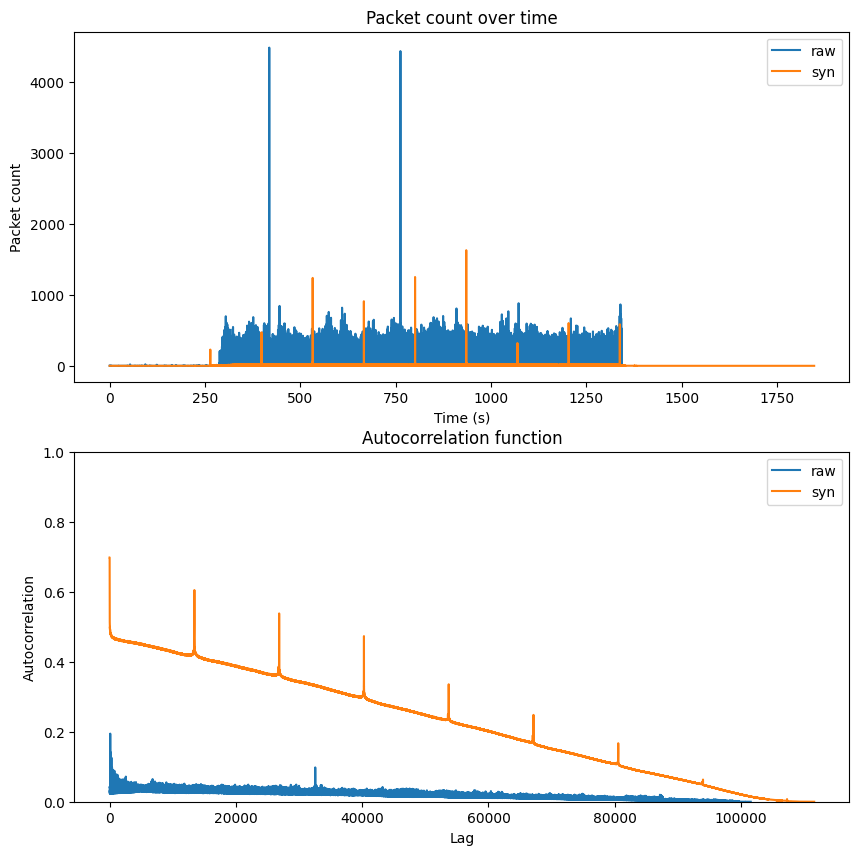

In [26]:
def pkt_count_cmp(time_unit_exp=1):
    dataset = "ugr16"
    filename = "raw.csv"

    # Load the data
    df = data.load_data(dataset, filename, verbose=False)

    # Compute the packet counts and its hurst exponent
    timestamps, timeseries = stats.pkt_count(df, time_unit_exp)

    # hurst = stats.hurst(packet_counts)

    # ts = np.random.normal(0, 1, 10000)
    ts = timeseries
    print(ts[:10])

    acf = stats.autocorr(ts)
    print(f"Autocorrelation function: {acf[:20]}")
    print(f"Autocorrelation function: {acf[-20:]}")

    hurst = stats.hurst(ts)
    print(f"Hurst exponent: {hurst}")

    fig, axes = plt.subplots(2, 1, figsize=(10, 10))
    axes[0].plot(timestamps, timeseries, label="raw")
    axes[0].set_xlabel("Time (s)")
    axes[0].set_ylabel("Packet count")
    axes[0].set_title("Packet count over time")

    axes[1].plot(acf, label="raw")
    axes[1].set_xlabel("Lag")
    axes[1].set_ylabel("Autocorrelation")
    axes[1].set_title("Autocorrelation function")


    dataset = "ugr16"
    filename = "syn.csv"

    # Load the data
    df = data.load_data(dataset, filename, verbose=False)

    # Compute the packet counts and its hurst exponent
    timestamps, timeseries = stats.pkt_count(df, time_unit_exp)

    # hurst = stats.hurst(packet_counts)

    # ts = np.random.normal(0, 1, 10000)
    ts = timeseries
    print(ts[:10])

    acf = stats.autocorr(ts)
    print(f"Autocorrelation function: {acf[:20]}")
    print(f"Autocorrelation function: {acf[-20:]}")

    hurst = stats.hurst(ts)
    print(f"Hurst exponent: {hurst}")

    axes[0].plot(timestamps, timeseries, label="syn")
    axes[0].legend()
    axes[1].plot(acf, label="syn")
    axes[1].legend()

    axes[1].set_ylim(0, 1)

    plt.show()

pkt_count_cmp(time_unit_exp=-2)


Loading data from:
	data/ugr16/raw.csv
Number of packets: 1000000
Trace duration: 1342.636 seconds
Time unit 1.0e-02 has 101539 bars
[ 124   31   93 6501 9008  204  120   62   62   62]
Autocorrelation function: [0.03369841 0.03369841 0.04954814 0.01092213 0.01405362 0.0086975
 0.00916215 0.00908285 0.00730802 0.01280827 0.00992201 0.00976072
 0.01030714 0.05841326 0.00864565 0.01713511 0.00798392 0.00961797
 0.00652439 0.01005765]
Autocorrelation function: [1.76038762e-06 1.91568258e-06 1.97122646e-06 1.83858205e-06
 1.21506309e-06 5.49884894e-07 3.40936614e-07 2.08422083e-07
 5.94215290e-07 4.77585739e-07 3.24987366e-07 3.00252105e-07
 4.41291558e-07 7.00209777e-07 5.26360020e-07 7.56081955e-06
 5.42015777e-06 8.30132153e-08 2.68132686e-08 1.03268440e-07]
Hurst exponent: 0.0013886344676364308
Loading data from:
	data/ugr16/syn.csv
Number of packets: 1051363
Trace duration: 1847.78589625 seconds
Time unit 1.0e-02 has 111583 bars
[123 135 155 113 116 153 158 162 133 128]
Autocorrelation

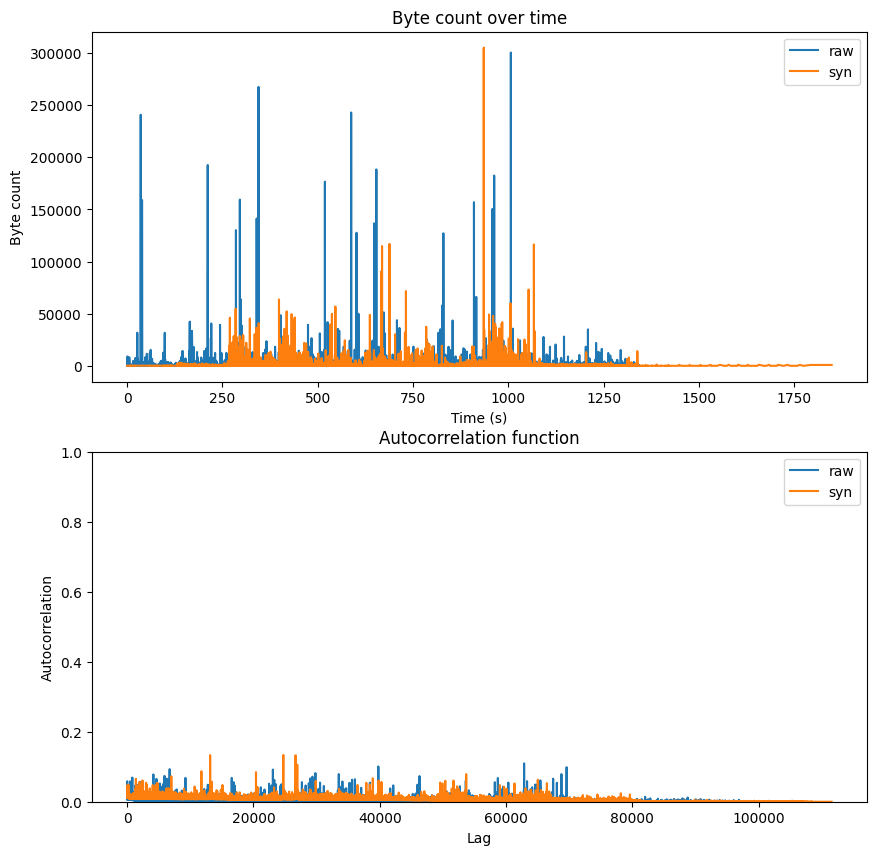

In [27]:
def byte_count_cmp(time_unit_exp=1):
    dataset = "ugr16"
    filename = "raw.csv"

    # Load the data
    df = data.load_data(dataset, filename, verbose=False)

    # Compute the packet counts and its hurst exponent
    timestamps, timeseries = stats.byte_count(df, time_unit_exp)

    # hurst = stats.hurst(packet_counts)

    # ts = np.random.normal(0, 1, 10000)
    ts = timeseries
    print(ts[:10])

    acf = stats.autocorr(ts)
    print(f"Autocorrelation function: {acf[:20]}")
    print(f"Autocorrelation function: {acf[-20:]}")

    hurst = stats.hurst(ts)
    print(f"Hurst exponent: {hurst}")

    fig, axes = plt.subplots(2, 1, figsize=(10, 10))
    axes[0].plot(timestamps, timeseries, label="raw")
    axes[0].set_xlabel("Time (s)")
    axes[0].set_ylabel("Byte count")
    axes[0].set_title("Byte count over time")

    axes[1].plot(acf, label="raw")
    axes[1].set_xlabel("Lag")
    axes[1].set_ylabel("Autocorrelation")
    axes[1].set_title("Autocorrelation function")


    dataset = "ugr16"
    filename = "syn.csv"

    # Load the data
    df = data.load_data(dataset, filename, verbose=False)

    # Compute the packet counts and its hurst exponent
    timestamps, timeseries = stats.byte_count(df, time_unit_exp)

    # hurst = stats.hurst(packet_counts)

    # ts = np.random.normal(0, 1, 10000)
    ts = timeseries
    print(ts[:10])

    acf = stats.autocorr(ts)
    print(f"Autocorrelation function: {acf[:20]}")
    print(f"Autocorrelation function: {acf[-20:]}")

    hurst = stats.hurst(ts)
    print(f"Hurst exponent: {hurst}")

    axes[0].plot(timestamps, timeseries, label="syn")
    axes[0].legend()
    axes[1].plot(acf, label="syn")
    axes[1].legend()

    axes[1].set_ylim(0, 1)

    plt.show()

byte_count_cmp(time_unit_exp=-2)


Loading data from:
	data/ugr16/raw.csv
Number of packets: 1000000
Trace duration: 1342.636 seconds
Time unit 1.0e-02 has 101539 bars
Time unit 1.0e-02 has 101539 bars
Loading data from:
	data/ugr16/syn.csv
Number of packets: 1051363
Trace duration: 1847.78589625 seconds
Time unit 1.0e-02 has 111583 bars
Time unit 1.0e-02 has 111583 bars


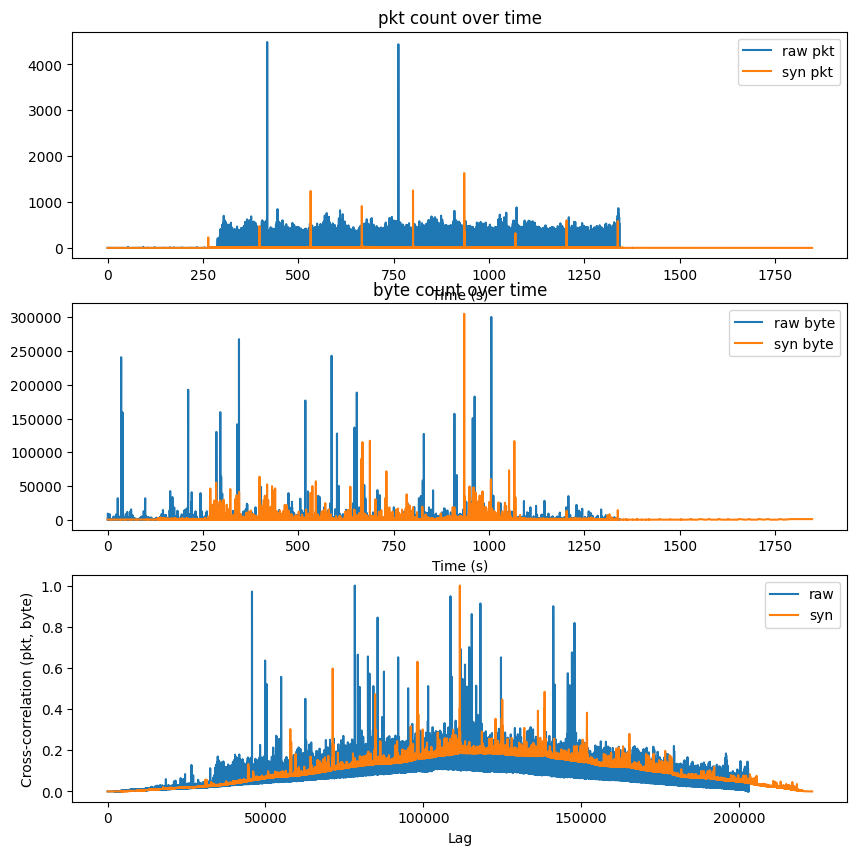

In [3]:
def pkt_byte_corr_cmp(time_unit_exp=1):
    dataset = "ugr16"
    filename = "raw.csv"

    # Load the data
    df = data.load_data(dataset, filename, verbose=False)

    # Compute the packet counts and its hurst exponent
    timestamps, pkt_counts = stats.pkt_count(df, time_unit_exp)
    timestamps, byte_counts = stats.byte_count(df, time_unit_exp)

    cross_corr = stats.cross_corr(pkt_counts, byte_counts)

    fig, axes = plt.subplots(3, 1, figsize=(10, 10))

    axes[0].plot(timestamps, pkt_counts, label="raw pkt")
    axes[0].set_xlabel("Time (s)")
    axes[0].set_title("pkt count over time")

    axes[1].plot(timestamps, byte_counts, label="raw byte")
    axes[1].set_xlabel("Time (s)")
    axes[1].set_title("byte count over time")

    axes[2].plot(cross_corr, label="raw")
    axes[2].set_xlabel("Lag")
    axes[2].set_ylabel("Cross-correlation (pkt, byte)")


    filename = "syn.csv"
    # Load the data
    df = data.load_data(dataset, filename, verbose=False)

    # Compute the packet counts and its hurst exponent
    timestamps, pkt_counts = stats.pkt_count(df, time_unit_exp)
    timestamps, byte_counts = stats.byte_count(df, time_unit_exp)
    cross_corr = stats.cross_corr(pkt_counts, byte_counts)

    axes[0].plot(timestamps, pkt_counts, label="syn pkt")
    axes[0].legend()

    axes[1].plot(timestamps, byte_counts, label="syn byte")
    axes[1].legend()

    axes[2].plot(cross_corr, label="syn")
    axes[2].legend()

    # axes[2].set_ylim(-1, 1)

pkt_byte_corr_cmp(time_unit_exp=-2)